<a href="https://colab.research.google.com/github/pragathi528/NNDL/blob/main/Ass_3_Stochastic_Gradient_Descent_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sym
from sympy import *
import random

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/sample.csv')
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


STEP 2 Missing Values treatment

Found no missing values after visualizing datset

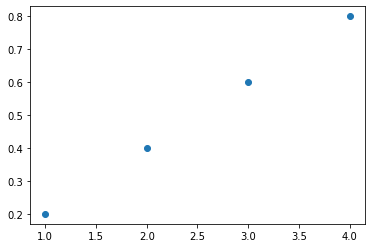

size of train_data: 2
size of test_data: 2


In [ ]:
#splitting of data
from sklearn.model_selection import train_test_split
x = np.array(df.iloc[:, 0])
y = np.array(df.iloc[:, 1])
plt.scatter(x, y)
plt.show()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print('size of train_data:',len(x_train))
print('size of test_data:',len(x_test))

In [ ]:
import numpy as np
df[np.abs(df.x-df.x.mean()) <= (3*df.x.std())]
df[np.abs(df.y-df.y.mean()) <= (3*df.y.std())]

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


Splitting the data

In [ ]:
x_train = df.iloc[0:3,1:2]
y_train = df.iloc[0:3,2:]
x_test = df.iloc[3:,1:2]
y_test = df.iloc[3:,2:]

In [ ]:
x_train

,x
0,0.2
1,0.4
2,0.6


In [ ]:
x_test

,x
3,0.8


In [ ]:
y_train

,y
0,3.4
1,3.8
2,4.2


In [ ]:
#step 1 : initialize model params
mi=1 #model parameters
ci=-1
n=0.1 #learning rate
epochs = 120
iter =1
x=0
y=0
m=1
c=-1
#ns = df.shape[0]
ns = len(x_train)

#step 2: start iteration and update iter
#iter = iter+1
for iter in range(1,epochs+1):
    #step 3: track samples
    #sample =1
    print("ITERATION : {}".format(iter))
    for sample in range(0,ns):
      xa = x_train['x'][sample].round(2)
      ya = y_train['y'][sample].round(2)
      print("-> SAMPLE {} : ".format(sample+1)+"x = {}".format(xa)+" y = {}".format(ya))
      #step 4 calculate gradient wrto each model parameters
      E=(0.5)*(y-m*x-c)**2  #ERROR FUNCTION
      #declare the variables that you will be using in the error function
      x=sym.Symbol('x')
      y=sym.Symbol('y')
      m=sym.Symbol('m')
      c=sym.Symbol('c')
      deltaE_m=sym.diff(E,m) #differentiation wrto m
      deltaE_c=sym.diff(E,c)  #differentiate wrto c
      print(deltaE_m)
      print(deltaE_c)

      deltaE_m = deltaE_m.subs(m, mi) 
      deltaE_m = deltaE_m.subs(c, ci)
      deltaE_m = deltaE_m.subs(x, xa)
      deltaE_m = deltaE_m.subs(y, ya)  
      deltaE_m = round(deltaE_m,2) 
       
      deltaE_c = deltaE_c.subs(m, mi)
      deltaE_c = deltaE_c.subs(c, ci)
      deltaE_c = deltaE_c.subs(x, xa)
      deltaE_c = deltaE_c.subs(y, ya)
      deltaE_c = round(deltaE_c,2) 

      print('Obtained Gradient wrto m and c:')
      print('deltaE_m: ',deltaE_m)
      print('deltaE_c: ',deltaE_c)

     
      #step 5 : calculate change
      del_m = -n*deltaE_m
      del_c = -n*deltaE_c
      #step 6: update model params
      mi = mi+del_m
      ci = ci+del_c
      print("m: {}".format(mi)+" c = {}".format(ci))
    
print("---------------------------------------------------------------")
print('Optimal Values')
print('m = {}'.format(mi))
print('c = {}'.format(ci))


ITERATION : 1
-> SAMPLE 1 : x = 0.2 y = 3.4
0
0
Obtained Gradient wrto m and c:
deltaE_m:  0
deltaE_c:  0
m: 1 c = -1
-> SAMPLE 2 : x = 0.4 y = 3.8
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c:
deltaE_m:  -1.76
deltaE_c:  -4.40
m: 1.17600097656250 c = -0.559960937500000
-> SAMPLE 3 : x = 0.6 y = 4.2
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c:
deltaE_m:  -2.43
deltaE_c:  -4.05
m: 1.41901855468750 c = -0.154980468750000
ITERATION : 2
-> SAMPLE 1 : x = 0.2 y = 3.4
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c:
deltaE_m:  -0.65
deltaE_c:  -3.27
m: 1.48405761718750 c = 0.172021484375000
-> SAMPLE 2 : x = 0.4 y = 3.8
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c:
deltaE_m:  -1.21
deltaE_c:  -3.03
m: 1.60505371093750 c = 0.475000000000000
-> SAMPLE 3 : x = 0.6 y = 4.2
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c:
deltaE_m:  -1.66
delta